# La regola di Taylor

## Introduzione 

La regola di Taylor (John B. Taylor, 1993) viene frequentemente utilizzata nei modelli macroeconomici, in quanto è in grado di rappresentare in maniera fedele e immediata i comportamenti della banca centrale.  
In ogni periodo la banca centrale sceglie un target per il tasso di interesse a breve in base alle condizioni dell'economia. Per raggiungere questo tasso, la banca centrale varia l'offerta di moneta per soddisfare la quantità domandata al tasso di interesse target. La prima semplice regola che fu proposta e che gode di importanti proprietà di stabilizzazione, oltre che fondamenta empiriche nel descrivere l'effettiva attività della banca centrale è la seguente:  

$$
    i_{t}=\bar{i}+\pi_{t}+.5y_{t}+.5(\pi_{t}-\bar{pi})
$$

dove $\bar{pi}=2$ rappresenta il livello di inflazione target, $\bar{i}=2$ il tasso di interesse naturale e $y$ l'output gap.  
Una formulazione più completa, che tiene conto della tendenza delle banche centrali a modificare i tassi in maniera graduale è più comunemente utilizzata:  

$$
    i_{t}=\rho i_{t-1} + \left(1-\rho\right)\left(\bar{i}+\varphi_{y}y_{t}+\varphi_{\pi}\pi_{t}\right)+\varepsilon_{t}
$$

dove si è aggiunto un termine stocastico, $\varepsilon_{t}$ che rappresenta shock della politica monetaria. Ovviamente $0\leq \rho \leq 1$. In assenza di shock, inflazione ed eccesso di domanda, la banca centrale aggiusta il tasso di interesse per seguire il livello del tasso naturale. Dall'altro lato, se l'economia si sta "scaldando", con prezzi in aumento o un output gap positivo, la banca aumenta i tassi a breve. Generalmente, $\varphi_{\pi}$ supera l'unità, in modo che i tassi vengano alzati in un rapporto superiore a uno quando aumenta l'inflazione. Questo fa sì che la banca possa muovere i tassi a sufficienza da stimolare o ridurre la domanda, a seconda della necessità.  
Questa regola è stata sintetizzata seguendo il consenso in letteratura, nonchè effettuando simulazioni con modelli complessi, che vanno oltre lo scopo di questa sezione. Può comunque essere interessante vedere all'opera la regola.

In [1]:
from config import *
%matplotlib inline

## L'output Gap

Nella sezione dedicata alla legge di Okun si è vista la definizione di output gap:  

$$
    y=\frac{Y_{t}-Y^*}{Y^*}\times100
$$

dove $Y^*$ rappresenta il prodotto potenziale, ottenuto in condizioni "normali" di occupazione. Nella pratica, l'ouput gap viene stimato utilizzando tecniche econometriche, scomponendo le serie storiche del PIL in 1.trend e 2.deviazioni dal trend, ovvero l'output gap. Una tecnica comunemente utilizzata è il filtro di Hodrick-Prescott, di cui viene fornita l'intuizione. La serie storica viene scomposta in trend $\tau_t$ e componente ciclica $c_t$ dove $y_t = \tau_t + c_t$. In base ad un valore costante di $\lambda$ si vuole quindi trovare $\tau$ tale da minimizzare la:  

$$
    \min_{\{\tau_t\}} \left(\sum_{t=1}^{T} (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} \left( (\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}) \right)^2\right)
$$

Si può scomporre la formula in due termini:  
- $(y_t - \tau_t)^2$ penalizza scostamenti del trend dalla serie storica  
- $\left( (\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}) \right)^2$ penalizza variazioni repentine nel trend  

Si nota come sia essenziale la scelta del parametro $\lambda$: quando $\lambda = 0$, $\tau_t = y_t$; per $\lambda \to \infty$ il problema di minimizzazione restuitirà una linea retta.  
Si può vedere all'opera il metodo sotto:

C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])


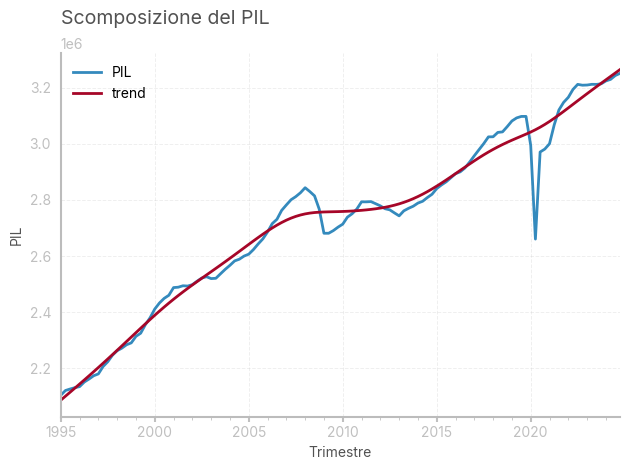

In [2]:
# Imposta la chiave per il recupero dei dati del PIL
PIL_KEY = 'MNA/Q.Y.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.N'

# Recupera i dati del PIL utilizzando la funzione make_df_ECB
pil = make_df_ECB(PIL_KEY, 'PIL')

# Imposta il parametro lambda per il filtro di Hodrick-Prescott (HP)
lambda_hp = 1600

# Applica il filtro HP al PIL per ottenere il ciclo e la tendenza
cycle, trend = sm.tsa.filters.hpfilter(pil.PIL, lamb=lambda_hp)

# Crea un DataFrame con i dati del PIL e aggiunge le colonne per ciclo e tendenza
gdp_decomp = pil[['PIL']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

# Crea una figura e un oggetto assi per il grafico
fig, ax = plt.subplots()

# Traccia il PIL e la tendenza nel grafico
gdp_decomp[['PIL','trend']].plot(ax=ax)

# Imposta il titolo del grafico e la sua posizione
ax.set_title('Scomposizione del PIL', loc='left')

# Imposta le etichette degli assi
ax.set_xlabel('Trimestre')
ax.set_ylabel('PIL')

# Aggiunge la legenda al grafico
plt.legend()

# Ottimizza il layout del grafico per evitare sovrapposizioni
plt.tight_layout()

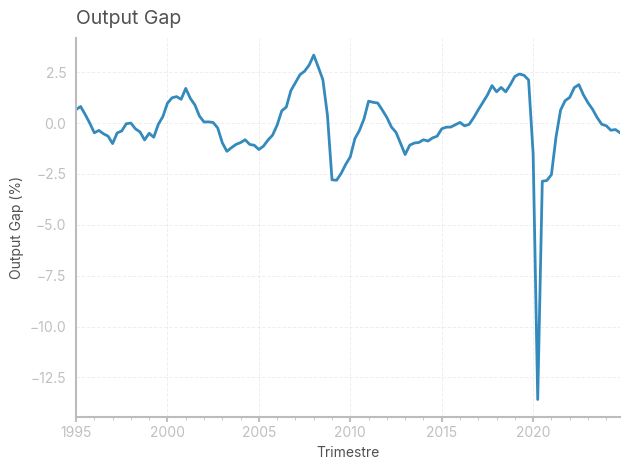

In [3]:
# Calcola il logaritmo naturale del PIL e lo aggiunge come nuova colonna 'log_PIL'
pil['log_PIL'] = np.log(pil['PIL'])

# Applica il filtro HP al logaritmo del PIL per ottenere il ciclo e la tendenza
cycle, trend = sm.tsa.filters.hpfilter(pil.log_PIL, lamb=lambda_hp)

# Moltiplica il ciclo per 100 per esprimere l'output gap in termini percentuali
cycle = cycle * 100

# Crea una figura e un oggetto assi per il grafico
fig, ax = plt.subplots()

# Traccia il ciclo (output gap) nel grafico
cycle.plot(ax=ax)

# Imposta il titolo del grafico e la sua posizione
ax.set_title('Output Gap', loc='left')

# Imposta le etichette degli assi
ax.set_xlabel('Trimestre')
ax.set_ylabel('Output Gap (%)')

# Ottimizza il layout del grafico per evitare sovrapposizioni
plt.tight_layout()

Vale la pena analizzare le principali proprietà dell'output gap.  
Vediamo che questo è correttamente centrato, relativamente persistente e stazionario. In questo caso, includere gli anni della pandemia fa sì che la serie sia decisamente asimmetrica e con code pesanti, il che fa sì che la serie non sia normalmente distribuita.

In [4]:
# Importa il modulo stats da scipy per le statistiche
import scipy.stats as stats

# Calcola la media del ciclo
mean_cycle = np.mean(cycle)

# Calcola la deviazione standard del ciclo (con correzione per il campione)
std_cycle = np.std(cycle, ddof=1)

# Calcola l'asimmetria del ciclo (skewness)
skew_cycle = stats.skew(cycle)

# Calcola la curtosi del ciclo (kurtosis) utilizzando la definizione di Fisher
kurt_cycle = stats.kurtosis(cycle, fisher=True)

# Calcola l'autocorrelazione di ordine 1 tra ciclo e ciclo spostato di 1 periodo
autocorr_cycle = np.corrcoef(cycle[:-1], cycle[1:])[0, 1]

# Calcola la statistica di Jarque-Bera e il p-value per testare la normalità
jb_stat, jb_p_value = stats.jarque_bera(cycle)

# Calcola la statistica di Dickey-Fuller per verificare la stazionarietà
adf_stat, adf_p_value, _, _, _, _ = sm.tsa.stattools.adfuller(cycle)

# Stampa i risultati delle statistiche calcolate con 4 decimali
print(f"Media: {mean_cycle:.4f}")
print(f"Deviazione Standard: {std_cycle:.4f}")
print(f"Asimmetria: {skew_cycle:.4f}")
print(f"Kurtosi: {kurt_cycle:.4f}")
print(f"Autocorrelazione del primo ordine: {autocorr_cycle:.4f}")
print(f"Jarque-Bera: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
print(f"Dickey-Fuller: {adf_stat:.4f}, p-value: {adf_p_value:.4f}")

Media: -0.0000
Deviazione Standard: 1.8016
Asimmetria: -3.4961
Kurtosi: 25.1821
Autocorrelazione del primo ordine: 0.6026
Jarque-Bera: 3415.1426, p-value: 0.0000
Dickey-Fuller: -5.3898, p-value: 0.0000


## La regola in pratica

Di seguito verrà mostrato come venga applicata la regola in pratica. Verranno estratte dal database della BCE le serie storiche di inflazione e il tasso sulle operazioni di rifinanziamento principali, utilizzato come benchmark per la regola. Per l'output gap, verrà utilizzata la serie appena ricavata.  
La regola di Taylor utilizzata è la  

$$
    i_{t}=\rho i_{t-1} + \left(1-\rho\right)\left(\bar{i}+\varphi_{y}y_{t}+\varphi_{\pi}\pi_{t}\right)+\varepsilon_{t}
$$

che è stata calibrata utilizzando parametri comuni in letteratura: $\bar{i}=1, \varphi_{y}=.5, \varphi_{\pi}=1.5$ ed utilizzando un coefficiente di smussamento abbastanza elevato, ad indicare la preferenza della BCE di evitare repentine variazioni nei tassi.  
Interessante è notare come la regola segua da vicino l'andamento dell'inflazione ma che in pratica, dal 2008 la BCE abbia per un lungo periodo cercato di mantenere i tassi prossimi allo zero, per favorire la ripresa dell'economia, accettando livelli di inflazione sopra al target. Solamente quando questa è esplosa a seguito delle conseguenza della guerra in Ucraina, la BCE è stata costretta ad aumentare i tassi per cercare di controllarne gli effetti negativi.

In [5]:
# Rinomina la serie del ciclo come 'y', seleziona i dati dal 1° gennaio 1999 in poi e li sposta di un periodo
y = cycle.rename('y')["1999-01-01":].shift(1)

# Definisce il codice identificativo per l'Inflation Rate (HICP)
HICP_key = 'ICP/M.U2.N.000000.4.ANR'

# Recupera i dati dell'Inflation Rate dal database ECB
HICP = make_df_ECB(HICP_key, 'pi')

# Raggruppa i dati per trimestre, prendendo l'ultima osservazione di ogni trimestre
HICP = HICP.groupby(pd.Grouper(freq='Q')).last()

# Imposta l'indice come il primo giorno di ogni trimestre
HICP.index = HICP.index.to_period('Q').to_timestamp(how='start')

# Seleziona i dati dell'inflazione dal 1° gennaio 1999 in poi e li sposta di un periodo
pi = HICP['pi']["1999-01-01":].shift(1)

# Definisce il codice identificativo per il tasso di interesse MRO
MRO_key = 'FM/B.U2.EUR.4F.KR.MRR_FR.LEV'

# Recupera i dati del tasso di interesse MRO dal database ECB
MRO = make_df_ECB(MRO_key, 'MRO')

# Reindicizza i dati MRO con frequenza trimestrale e li riempie con il metodo forward fill
i = MRO['MRO'].reindex(pd.date_range(start="1999-01-01", end="2025-01-01", freq="Q").to_period('Q').to_timestamp(how='start'), method='ffill')

# Crea una nuova serie spostata di un periodo e la rinomina come 'ilag1'
ilag1 = i.shift(1).rename('ilag1')

# Combina le serie 'ilag1', 'pi', 'y' e 'i' in un unico DataFrame, rimuovendo i valori mancanti
taylor = pd.concat([ilag1, pi, y, i], axis=1).dropna()

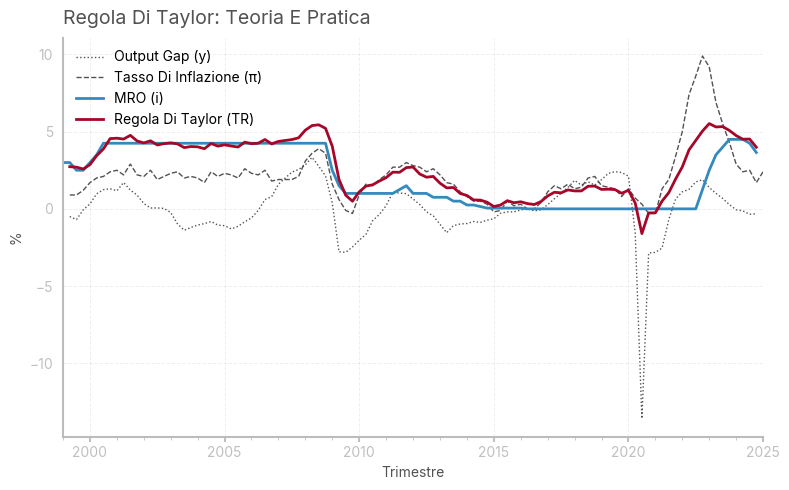

In [9]:
# Calcola la Regola di Taylor (TR) come una combinazione lineare di tassi di interesse, output gap e inflazione
taylor['TR'] = .7*taylor['ilag1'] + .3* (1 + .5*taylor['y'] + 1.5*(taylor['pi']))

# Crea una figura e un oggetto assi per il grafico con dimensioni specifiche
fig, ax = plt.subplots(figsize=(8, 5))

# Traccia il grafico dell'Output Gap (y) con linea tratteggiata
y.plot(ax=ax, label='Output Gap (y)', color='#525252', linestyle=':', linewidth=1)

# Traccia il grafico dell'Inflazione (π) con linea tratteggiata
pi.plot(ax=ax, label='Tasso Di Inflazione (π)', color='#525252', linestyle='--', linewidth=1)

# Traccia il grafico del tasso di interesse MRO (i) con una linea solida
i.plot(ax=ax, label='MRO (i)', color=bmh_colors[0], linestyle='-', linewidth=2)

# Traccia il grafico della Regola di Taylor (TR) con una linea solida
taylor.TR.plot(ax=ax, label='Regola Di Taylor (TR)', color=bmh_colors[1], linestyle='-', linewidth=2)

# Imposta il titolo del grafico e la sua posizione
ax.set_title('Regola Di Taylor: Teoria E Pratica', loc='left')

# Imposta le etichette degli assi
ax.set_xlabel('Trimestre')
ax.set_ylabel('%')

# Aggiunge la legenda al grafico
ax.legend(loc='best')

# Ottimizza il layout del grafico per evitare sovrapposizioni
plt.tight_layout()